# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
import pickle
import random
from random import shuffle
import tensorflow as tf
import tensorflow_datasets as tfds
import torch
import cv2
from tqdm import tqdm
import math
import seaborn as sns
from PIL import Image
import PIL
from keras.models import model_from_json
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading Dataset**


In [3]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/Graduation_Project/Datasets/Preprocessed_UTK_DS.zip', 'r') as zipObj:
  zipObj.extractall('')

with ZipFile('/content/drive/MyDrive/Graduation_Project/Datasets/preprocessed_Kaggle_Audience_DS.zip', 'r') as zipObj:
  zipObj.extractall('')


with ZipFile('/content/drive/MyDrive/Graduation_Project/Datasets/Filtered_Preprocessed_Private_DS.zip', 'r') as zipObj:
  zipObj.extractall('')


In [4]:
imagesPaths=[]

In [5]:
# def get_label_for_regression(index):
#     age_index = {'0-2':random.randint(0,2),
#                  '4-6':random.randint(4,6),
#                  '8-13':random.randint(8,13),
#                  '15-20':random.randint(15,20),
#                  '25-32':random.randint(25,32),
#                  '38-43':random.randint(38,43),
#                  '48-53':random.randint(48,53),
#                  '60-100':random.randint(60,100)
#                   }

#     return age_index[index]





def list_images_paths(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=None,is_label_int=False,data={}):

    # loop over the directory structure
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # loop over the filenames in the current directory
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
              print("contains is not None and filename.find(contains) == -1")
              continue

            # determine the file extension of the current file
            try:
              # print(filename.split('_')[0])
              age = filename.split('_')[0]
              # if class_label:
              #   age=get_label_for_regression(age)
            except Exception:
              print('ERROR IN CONVERTING THE AGE TO INT')
              continue
            # if is_label_int:
            #  if int(age) > 70:
            #    print(filename.split('_')[0])
            #    continue
            # else:
            #  if(age == "60-100"):
            #     print(filename.split('_')[0])
            #     continue
            ext = filename[filename.rfind("."):].lower()

            # check to see if the file is an image and should be processed
            if ext.endswith(validExts):
              # construct the path to the image and yield it
              imagePath = os.path.join(rootDir, filename).replace(" ", "\\ ")
              if age not in data.keys():
                  data[age]=[]
              data[age].append([imagePath, age])
              #yield [imagePath, age]
    # return data



> UTK dataset



In [6]:
utk_dict={}
list_images_paths('/content/content/Preprocessed_UTK_DS',is_label_int=True,data=utk_dict)

In [7]:
# #down sampling
# for i in utk_dict.keys():
#   if  len(utk_dict[i]) > 700:
#     utk_dict[i]=random.sample(utk_dict[i], 700)

In [8]:
count=list(len(utk_dict[i]) for i in utk_dict.keys() )
keys=list(utk_dict.keys())

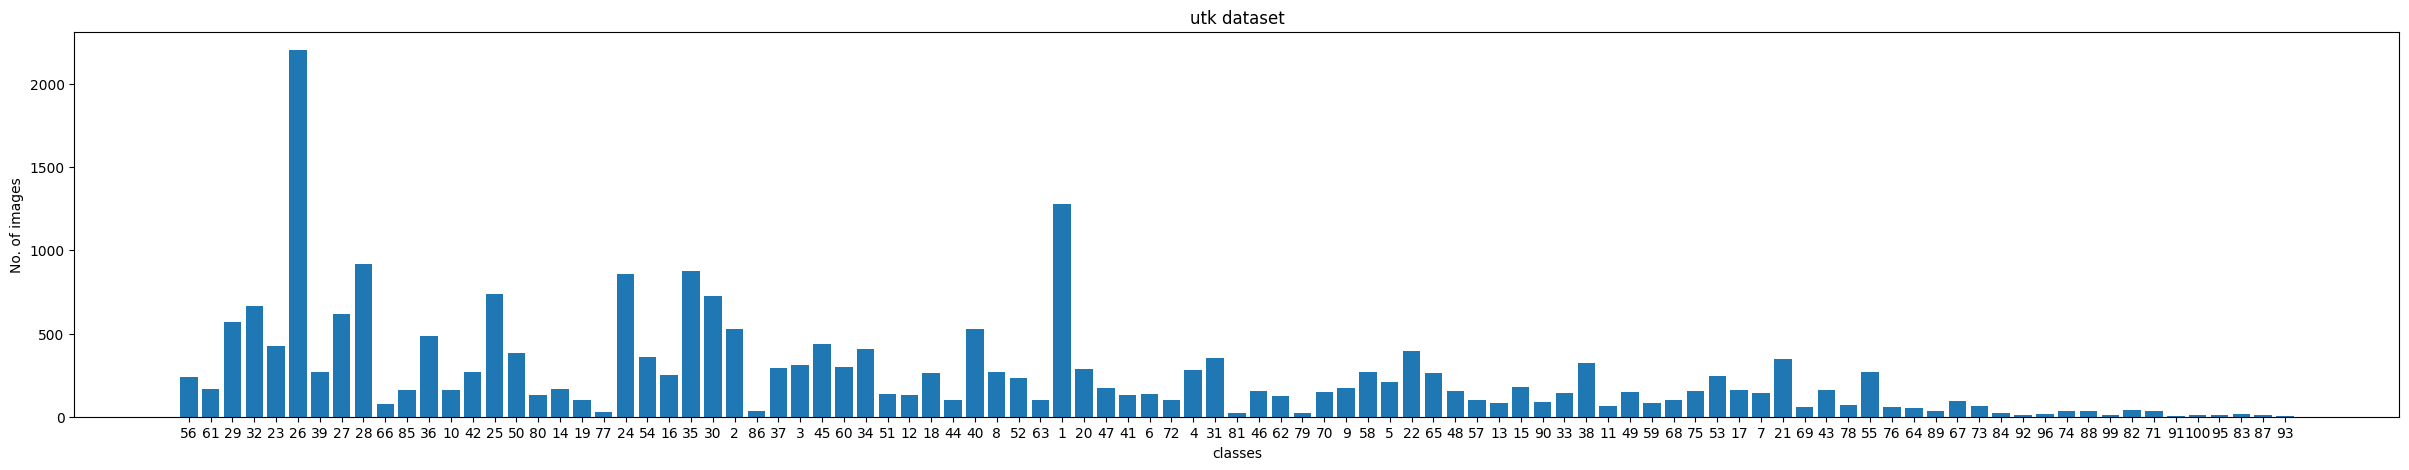

In [9]:
fig = plt.figure(figsize = (30, 5))
plt.bar(keys, count)

plt.xlabel("classes")
plt.ylabel("No. of images")
plt.title("utk dataset")
plt.show()

In [10]:
#take only images with age from 0 - 70
for i in utk_dict.keys():
   if int(i) >= 0 and int(i) <= 70:
     imagesPaths.extend(utk_dict[i])



> Aduience dataset



In [11]:
aduience_dict={}
list_images_paths('/content/content/preprocessed_Kaggle_Audience_DS',data=aduience_dict)


In [12]:
# #down sampling
# for i in aduience_dict.keys():
#   if  len(aduience_dict[i]) > 4000:
#     aduience_dict[i]=random.sample(aduience_dict[i], 4000)

In [13]:
aduience_count=list(len(aduience_dict[i]) for i in aduience_dict.keys() )
classes=list(aduience_dict.keys())

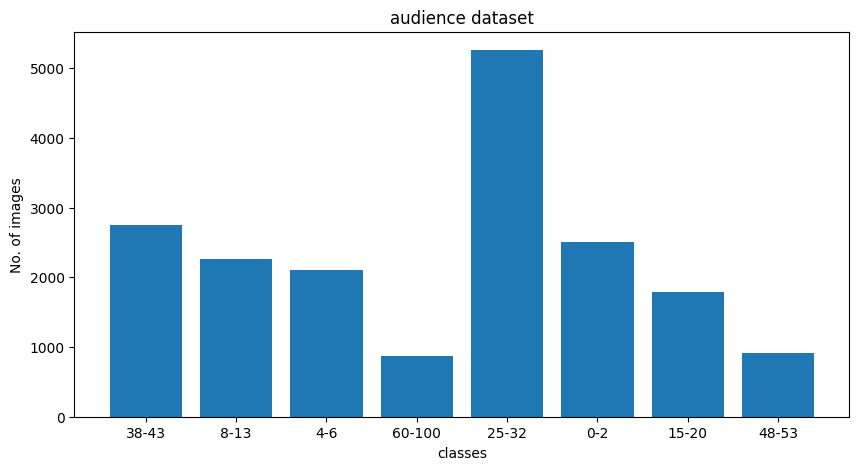

In [14]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(classes, aduience_count)

plt.xlabel("classes")
plt.ylabel("No. of images")
plt.title("audience dataset")
plt.show()

In [15]:
#take all groups except 60-100
for i in aduience_dict.keys():
  if i != '60-100':
      imagesPaths.extend(aduience_dict[i])



> Private dataset



In [16]:
Private_dict={}
list_images_paths('/content/Filtered_Preprocessed_Private_DS',data=Private_dict)

In [17]:
private_count=list(len(Private_dict[i]) for i in Private_dict.keys() )
classes=list(Private_dict.keys())

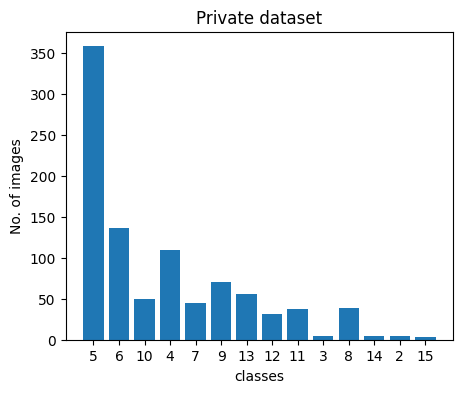

In [18]:
fig = plt.figure(figsize = (5, 4))

# creating the bar plot
plt.bar(classes, private_count)

plt.xlabel("classes")
plt.ylabel("No. of images")
plt.title("Private dataset")
plt.show()

In [19]:
for i in Private_dict.keys():
  imagesPaths.extend(Private_dict[i])

In [20]:
whole_paths=np.array(imagesPaths)
whole_paths.shape

(41317, 2)

In [21]:
whole_paths[0]

array(['/content/content/Preprocessed_UTK_DS/56_age_30227_ID.jpg', '56'],
      dtype='<U71')

/content/content/preprocessed_Kaggle_Audience_DS/38-43_age_13021_ID.jpg
Images Shape =  (474, 346, 3)
Ages =  38-43


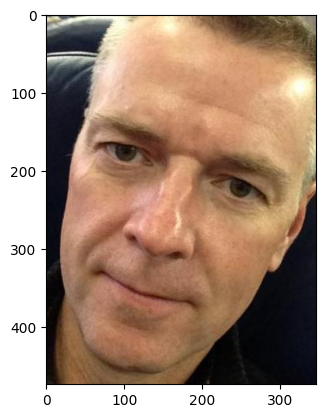

In [22]:
## Visualization Cell

image_row = whole_paths[23510]
print(image_row[0])
image_row[0] = image_row[0].replace('\\','/')
img = cv2.imread(image_row[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, [96,96],interpolation = cv2.INTER_AREA )# rescale image by shrinking
age = image_row[1]

print("Images Shape = ", img.shape)

print("Ages = ", age)

pyplot.imshow(img)
pyplot.show()

In [23]:
# Shuffle DS
np.random.shuffle(whole_paths)
print(whole_paths.shape)

(41317, 2)


<Axes: ylabel='count'>

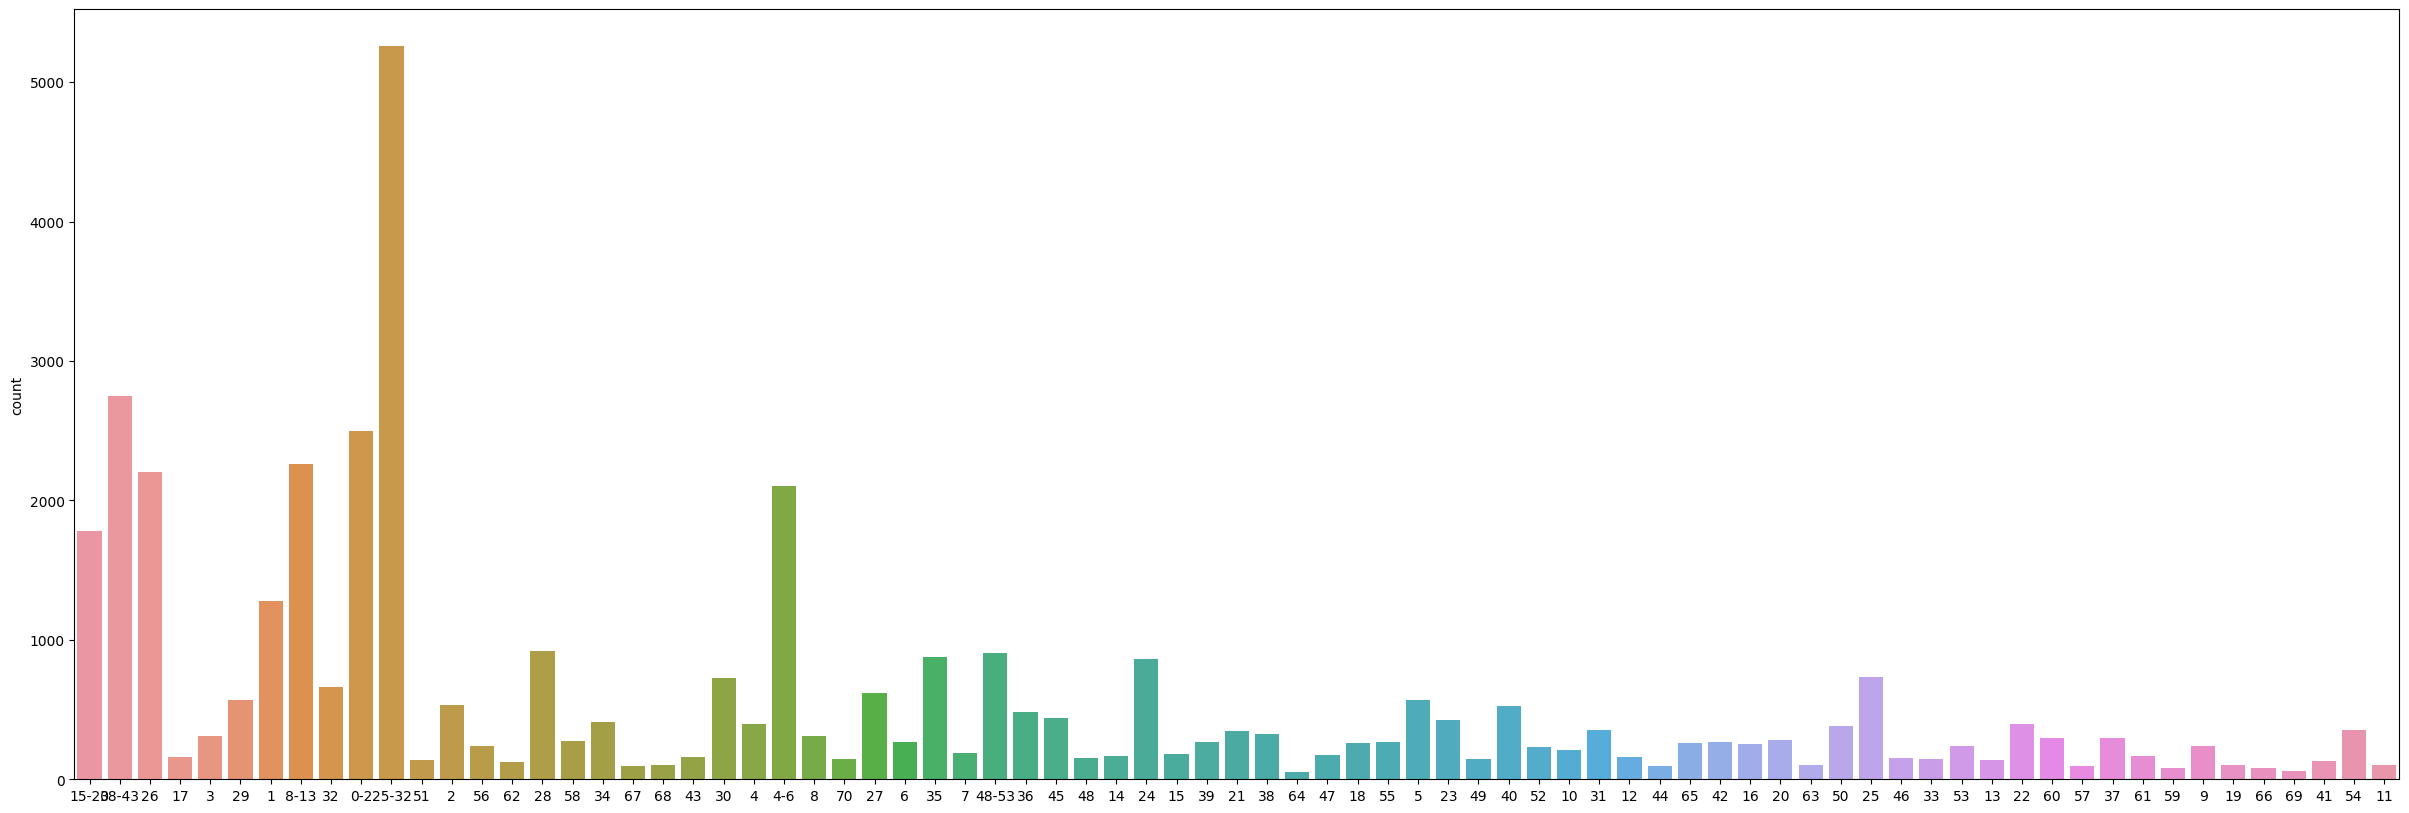

In [24]:
# import seaborn as sns
f, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x=whole_paths[:,1],ax=ax)

In [25]:
# # importing pandas library
# import pandas as pd
# # import matplotlib library
# import matplotlib.pyplot as plt

# # creating dataframe
# df = pd.DataFrame({
#     'model': [ 'ShuffleNetv2','MobileNetv2', 'VGG-Face'],
#     'Exact-accuracy %': [48, 51, 66],
#     '1-off accuracy': [67, 70, 84]
# })

# # plotting graph
# df.plot(x="model", y=["Exact-accuracy %", "1-off accuracy"], kind="bar")



# **Prepare Dataset**



In [26]:
def get_class_id(age):
   _key=None
   if age >= 0 and age <= 3:
            _key= 0
   elif age >= 4 and age <= 6:
           _key= 1
   elif age >= 7 and age <= 14:
           _key= 2
   elif age >= 15 and age <= 20:
           _key= 3
   elif age >= 21 and age <= 32:
           _key= 4
   elif age >= 33 and age <= 45:
          _key= 5
   else:
         _key= 6
   return _key

In [27]:
def get_label_from_its_class(index):
    age_index = {'0-2':0,
                 '4-6':1,
                 '8-13':2,
                 '15-20':3,
                 '25-32':4,
                 '38-43':5,
                 '48-53':6,
                 #'60-100':6
                  }

    return age_index[index]



In [ ]:
X = whole_paths[:,0] # Images Paths
Y = whole_paths[:,1] # Ages

In [32]:
#grouping dataset int 7 classes
data={}
for path in whole_paths:
   _key=None

   if '-' not in str(path[1]): #if label discrete
       age=int(path[1])
       _key=get_class_id(age)
   else:                       #if label ranges
      _key=get_label_from_its_class(str(path[1]))

   path = np.append(path, _key) #path consist of [0] path,[1] age, [2] class id
   if _key not in data.keys():
      data[_key]=[]
   data[_key].append(path)


In [34]:
for i in data.keys():
  print("class "+str(i)+" : "+str(len(data[i])))

class 3 : 3024
class 5 : 7165
class 4 : 14074
class 0 : 4626
class 2 : 3780
class 6 : 5320
class 1 : 3328


In [35]:
count=[len(data[i]) for i in data.keys()]
keys=list(data.keys())

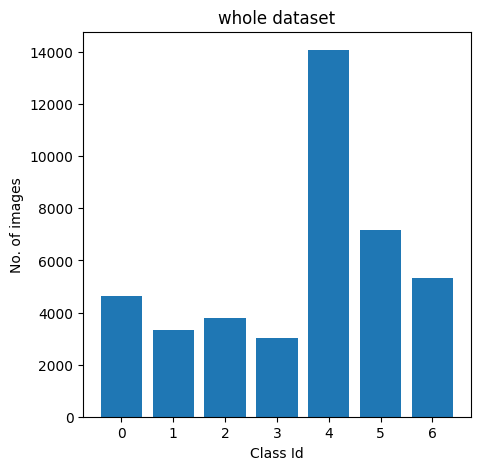

In [36]:
fig, ax = plt.subplots(figsize =(5, 5))
# creating the bar plot
plt.bar(keys, count)

plt.xlabel("Class Id")
plt.ylabel("No. of images")
plt.title("whole dataset")
plt.show()



> Down sampling majority classes



In [37]:
data[4]=random.sample(data[4], 6000)
data[5]=random.sample(data[5], 6000)

In [38]:
count=[ len(data[i]) for i in data.keys() ]
keys=list(data.keys())

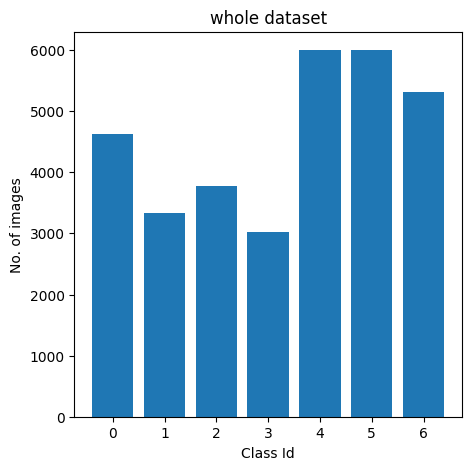

In [39]:
#visualize after down sampling
fig, ax = plt.subplots(figsize =(5, 5))
# creating the bar plot
plt.bar(keys, count)

plt.xlabel("Class Id")
plt.ylabel("No. of images")
plt.title("whole dataset")
plt.show()



> Train Validation Test split (70% 15% 15%) per class



In [40]:
train_data=[]
validation_data=[]
test_data=[]
train_dict={}
for key in data.keys():
  train, validation = np.split(data[key], [int(len(data[key])*0.7)]) #70%,30%
  validation,test=np.split(validation, [int(len(validation)*0.5)]) #15%,15%
  if key not in train_dict.keys():
      train_dict[key]=[]
  train_dict[key].extend(train)
  train_data.extend(train)
  validation_data.extend(validation)
  test_data.extend(test)



> apply augmentation for minority classes (on train data)



In [ ]:
def augment(img_path):
  from keras.preprocessing.image import ImageDataGenerator
  from tensorflow.keras.utils import img_to_array, array_to_img, load_img
  datagen = ImageDataGenerator(
        rotation_range=45,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
  img = load_img(img_path[0])
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)


  batch1= datagen.flow(x, batch_size=1)


  image = batch1[0][0].astype('uint8')
  # print(image)
  # plt.imshow(array_to_img(image))
  # plt.show()
  return image


In [ ]:
def balance_classes(train_dict):
  new_train_images=[]
  max_cls_cnt=len(train_dict[4])
  for key in train_dict.keys():
    cls_cnt=len(train_dict[key])
    need_cnt=max_cls_cnt - cls_cnt
    if need_cnt != 0:
      for i in range(need_cnt):
        sample_img=random.sample(train_dict[key], 1)

        new_img=augment(sample_img[0])
        file_path='/content/augment/'+str(sample_img[0][1])+ '_age_' + str(i) +'_ID.jpg'
        image = np.array(new_img) # Not sure to add this line or not
        image = PIL.Image.fromarray(image)
        image.save(file_path)
        print(file_path)
        new_img_path=[file_path,sample_img[0][1],sample_img[0][2]]
        new_train_images.append(new_img_path)

  return new_train_images

In [ ]:
# new_train_aug_images=balance_classes(train_dict)

In [ ]:
# train_data.extend(new_train_aug_images)



> shuffle and save data in folders for training



In [ ]:
print(len(train_data))
print(len(validation_data))
print(len(test_data))
shuffle(train_data)
shuffle(validation_data)
shuffle(test_data)

22452
4812
4814


In [ ]:
train_paths = np.array(train_data)
val_paths = np.array(validation_data)
test_paths = np.array(test_data)



> Save images into folders (train,valid,test),

    Each folder contain sub-folders(C0:C6) that represent images classes.



In [ ]:
#create empty folders for save images
%cd /content
%mkdir data
%cd /content/data

%mkdir train
%cd train
%mkdir C0 C1 C2 C3 C4 C5 C6

%cd ..
%mkdir valid
%cd valid
%mkdir C0 C1 C2 C3 C4 C5 C6

%cd ..
%mkdir test
%cd test
%mkdir C0 C1 C2 C3 C4 C5 C6

%cd /content


/content
/content/data
/content/data/train
/content/data
/content/data/valid
/content/data
/content/data/test
/content


In [ ]:
def save_images(imagesPaths,root_path):
    i = 0
    for path in tqdm(imagesPaths):
       path[0] = path[0].replace('\\','/')
       try:
         image=PIL.Image.open(path[0])
       except Exception:
          print('ERROR IN reading image')
          continue


       id=path[2]
       age=path[1]


       directory_path=root_path+"/C"+str(id)+"/"



       if image is not None:
         # Save the image after preprocessing to a folder
        #  image = np.array(image) # Not sure to add this line or not
        #  image = PIL.Image.fromarray(image)

        #  pyplot.imshow(image)
        #  pyplot.show()
        #  break


         image_filename = directory_path + str(age) + '_age_' + str(i) +'_ID.jpg' # IMAGE PATH
         image.save(image_filename)
         print(image_filename)


       i+=1






In [ ]:
save_images(train_paths,'/content/data/train')
save_images(val_paths,'/content/data/valid')

In [ ]:
save_images(test_paths,'/content/data/test')

/content/content/preprocessed_Kaggle_Audience_DS/25-32_age_7828_ID.jpg
Images Shape =  (362, 282, 3)
Ages =  25-32


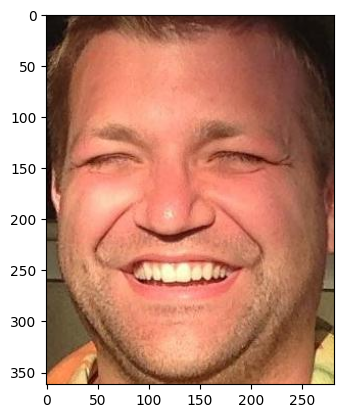

In [ ]:
# Visualization Cell

image_row = train_paths[135]
print(image_row[0])
image_row[0] = image_row[0].replace('\\','/')
img = cv2.imread(image_row[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, [96,96])
age = image_row[1]

print("Images Shape = ", img.shape)

print("Ages = ", age)

pyplot.imshow(img)
pyplot.show()

In [ ]:
# %rm -r /content/data

In [ ]:
# %ls -a

In [ ]:
# %cd  /content/data/train
# %rmdir .ipynb_checkpoints

In [ ]:
# %cd  /content/data/valid
# %rmdir .ipynb_checkpoints

#**TF data_generator**

In [ ]:
# from tensorflow.keras.layers.experimental import preprocessing

# trainAug = tf.keras.Sequential([
# 	preprocessing.RandomFlip("horizontal_and_vertical"),
# 	preprocessing.RandomZoom(
# 		height_factor=(-0.05, -0.15),
# 		width_factor=(-0.05, -0.15)),
# 	preprocessing.RandomRotation(0.5)
# ])

# def augment_using_layers(images):
# 	# pass a batch of images through our data augmentation pipeline
# 	# and return the augmented images
# 	images = trainAug(images)
# 	# return the image and the label
# 	return images

# def img_augmentation(image):
#   #image=image.numpy()
#   image=tf.keras.preprocessing.image.random_rotation(image,np.random.uniform(-90,90),row_axis=0,col_axis=1,
#                                                      channel_axis=2,
#                                                      fill_mode='nearest')
#   image=tf.keras.preprocessing.image.random_zoom(image,(0.7, 0.9),row_axis=0,col_axis=1,
#                                                  channel_axis=2,
#                                                  fill_mode='nearest')
#   #image = tf.keras.preprocessing.image.random_brightness(image, (0.7,0.8))
#   #image=tf.convert_to_tensor(image)


#   return image
# def augment_using_ops(images):
# 	images = tf.image.random_flip_left_right(images)
# 	images = tf.image.random_flip_up_down(images)
#	  images = tf.image.rot90(images)
# 	return images

#data augmentation






> Intialize model parameters



In [ ]:
#intialize model parameters

from sklearn.utils.class_weight import compute_class_weight

y_train=[int(label) for label in train_paths[:,2]]
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(y_train),
                                     y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
print(class_weights)
batch_size=256
img_size=224
EPOCHS=5
dir_path='/content/data'
num_classes=7
learning_rate=0.01
num_images_train=train_paths.shape[0]
num_images_valid=val_paths.shape[0]
num_images_test=test_paths.shape[0]

{0: 0.9905585458395835, 1: 1.377169846040606, 2: 1.2121801101392937, 3: 1.5157980016203079, 4: 0.7636734693877552, 5: 0.7636734693877552, 6: 0.8615172096235755}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def load_data_using_keras(folders):
    """
    Load the images in batches using Keras.
    Shuffle images (for training set only) using keras.
    Returns:
    Data Generator to be used while training the model.
    Note: Keras might need 'pillow' library to be installed. Use-
    # pip install pillow
    """
    train_generator = {}
    val_generator={}
    image_generator={}
    data_generator = {}
    for x in folders:
        image_generator[x] = ImageDataGenerator(rescale=1./255)

        shuffle_images = True if x == 'train' else False

        data_generator[x] = image_generator[x].flow_from_directory(
            batch_size=batch_size,
            directory=os.path.join(dir_path, x),
            shuffle=shuffle_images,
            target_size=(img_size, img_size),
            class_mode='categorical')

    return data_generator

In [ ]:
# def parse_image(file_path):
#         # convert the path to a list of path components
#         parts = tf.strings.split(file_path, os.path.sep)

#         # load the raw data from the file as a string
#         img = tf.io.read_file(file_path)
#         # convert the compressed string to a 3D uint8 tensor
#         img = tf.image.decode_jpeg(img, channels=3)
#         # Use `convert_image_dtype` to convert to floats in the [0,1] range
#         img = tf.image.convert_image_dtype(img, tf.float32)
#         # resize the image to the desired size.
#         img = tf.image.resize(img, [img_size, img_size])



#         return img
# def train_preprocess(image):

#        image = tf.image.random_flip_left_right(image)
#        rotate = tf.keras.layers.RandomRotation(0.2)
#        image=rotate(image)

#       #  #Make sure the image is still in [0, 1]
#       #  image = tf.clip_by_value(image, 0.0, 1.0)

#        return image
# im=parse_image("/content/data/train/C2/10_age_10419_ID.jpg")
# im=train_preprocess(im)
# im=im.numpy()
# print(im.shape)
# plt.imshow(im)

In [ ]:
def load_data_using_tfdata(folders):
    """
    Load the images in batches using Tensorflow (tfdata).
    Cache can be used to speed up the process.
    Faster method in comparison to image loading using Keras.
    Returns:
    Data Generator to be used while training the model.
    """
    file_name=None


    def parse_image(file_path):
        # convert the path to a list of path components
        parts = tf.strings.split(file_path, os.path.sep)
        class_names = np.array(['C0','C1','C2','C3','C4','C5','C6'])
        # The second to last is the class-directory
        label = int(parts[-2] == class_names)
        # load the raw data from the file as a string
        img = tf.io.read_file(file_path)
        # convert the compressed string to a 3D uint8 tensor
        img = tf.image.decode_jpeg(img, channels=3)
        # Use `convert_image_dtype` to convert to floats in the [0,1] range
        img = tf.image.convert_image_dtype(img, tf.float32)
        # resize the image to the desired size.
        img = tf.image.resize(img, [img_size, img_size])



        return img, label

    def train_preprocess(image, label):

       image = tf.image.random_flip_left_right(image)
       rotate = tf.keras.layers.RandomRotation(0.2)
       #image=rotate(image)

      #  #Make sure the image is still in [0, 1]
      #  image = tf.clip_by_value(image, 0.0, 1.0)

       return image, label


    def prepare_for_validation(ds, cache=True, shuffle_buffer_size=1000):
        # If a small dataset, only load it once, and keep it in memory.
        # use `.cache(filename)` to cache preprocessing work for datasets
        # that don't fit in memory.
        if cache:
            if isinstance(cache, str):
                ds = ds.cache(cache)
            else:
                ds = ds.cache()

        # Repeat forever
        ds = ds.repeat()
        ds = ds.batch(batch_size)
        # `prefetch` lets the dataset fetch batches in the background
        # while the model is training.
        ds = ds.prefetch(buffer_size=AUTOTUNE)
        return ds

    def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
        # If a small dataset, only load it once, and keep it in memory.
        # use `.cache(filename)` to cache preprocessing work for datasets
        # that don't fit in memory.
        if cache:
            if isinstance(cache, str):
                ds = ds.cache(cache)
            else:
                ds = ds.cache()

        ds = ds.shuffle(buffer_size=shuffle_buffer_size)
        # Repeat forever
        ds = ds.repeat()
        ds = ds.batch(batch_size)
        # `prefetch` lets the dataset fetch batches in the background
        # while the model is training.
        ds = ds.prefetch(buffer_size=AUTOTUNE)
        return ds

    data_generator = {}
    for x in folders:
        dir_extend = dir_path + '/' + x
        list_ds = tf.data.Dataset.list_files(str(dir_extend+'/*/*'))
        AUTOTUNE = tf.data.experimental.AUTOTUNE
        # Set `num_parallel_calls` so that multiple images are
        # processed in parallel
        file_name=x
        labeled_ds = list_ds.map(
            parse_image, num_parallel_calls=AUTOTUNE)
        # cache = True, False, './file_name'
        # If the dataset doesn't fit in memory use a cache file,
        # eg. cache='./data.tfcache'
        if(x == 'valid' or x == 'test'):
            data_generator[x] = prepare_for_validation(
            labeled_ds, cache='data.tfcache_'+x)
            print(x)
        else:
            labeled_ds = labeled_ds.map(
            train_preprocess, num_parallel_calls=AUTOTUNE)#data augmentation

            data_generator[x] = prepare_for_training(
            labeled_ds, cache='data.tfcache_'+x)

    return data_generator


In [ ]:
data_generator=load_data_using_tfdata(['train','valid'])

valid


In [ ]:
test_generator=load_data_using_tfdata(['test'])

test


# **Custom Data generator**

In [ ]:
def imageEnhancement(image):

    # Denosing
    image = cv2.fastNlMeansDenoisingColored(np.uint8(image),None,5,10,7,21)

    return image

In [ ]:
def imagePreprocessing(image,image_size=96):

    # Enhancement
    #image = imageEnhancement(image)

    # Alignment and Cropping
    #print("before face detection")
    # image = yolov5(image, model_path='yolov5s_face.onnx')
    # #print("After face detection")
    # if image is None:
    #     #print('Empty Image from Alignment and Cropping')
    #     return None

    # Image size for our model.
    MODEL_INPUT_IMAGE_SIZE = [ image_size , image_size ]
    #denoising
    # image=imageEnhancement(image)
    # Resizing
    #print("before resize")
    image = cv2.resize(image, MODEL_INPUT_IMAGE_SIZE)
    #print("After resize")
    # Normalization
    image = image/255.0

    return image # Return image after resizing

In [ ]:
def get_classes_label(imagesPaths):

  labels = []

  i=0
  for path in (imagesPaths):

    # try:

      age = int(path[1])
      _key=get_class_id(age)

      label=np.zeros(num_classes)
      label[_key]=1

      labels.append(label)

      # if i==0:
      #   labels = np.array([label, ])
      # else:
      #   labels = np.append(labels, label)

      i+=1

    # except Exception:
    #   print('ERROR IN LOADING THE LABEL')
    #   continue

  return np.array(labels)

In [ ]:
def get_labels(imagesPaths):

  labels = np.array([])

  i=0
  for path in imagesPaths:

    try:

      age = int(path[1])



      if i==0:
        labels = np.array([age, ])
      else:
        labels = np.append(labels, [age])

      i+=1

    except Exception:
      print('ERROR IN LOADING THE LABEL')
      continue

  return labels

In [ ]:
def read_images(imagesPaths,img_size=96):

  dataset = np.array([])

  i=0
  for path in (imagesPaths):

    try:
      path[0] = path[0].replace('\\','/')
      image = cv2.imread(path[0])

      # Check if the path is wrong
      if image is None:
        print('Wrong path:', path[0])
        continue

      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # Image Preprocessing
      image = imagePreprocessing(image,img_size)
      # pyplot.imshow(image)
      # pyplot.show()
      # break
      # Check if the image is None after alignment and cropping
      # if image is None:
      #   continue


      # Add the image and the age to the ds
      if i==0:
        dataset = np.array([image, ])
      else:
        dataset = np.append(dataset, [image], axis=0)

      i+=1

    except Exception:
      print('ERROR IN LOADING THE IMAGE')
      continue

  return dataset

In [ ]:
# read_images(train_paths,96)

In [ ]:
def dataGenerator(imgs_paths, img_size=96, batch_size=32):

  while True:

    num_batches = math.ceil((imgs_paths.shape[0])/batch_size)
    imgs = None
    labels = None

    for i in range(0, num_batches):

      if i < num_batches-1:
        current_batch_index = i*batch_size
        batch_imgs_paths = imgs_paths[current_batch_index:current_batch_index+batch_size]
        imgs = read_images(batch_imgs_paths,img_size) # Takes the first column
        labels = get_labels(batch_imgs_paths) # Takes the second column

      elif i == num_batches-1:
        current_batch_index = i*batch_size
        batch_imgs_paths = imgs_paths[current_batch_index:]
        imgs = read_images(batch_imgs_paths,img_size)
        labels = get_labels(batch_imgs_paths)

      yield (imgs, labels)

In [ ]:
X = whole_paths[:,0] # Images Paths
Y = whole_paths[:,1] # Ages

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [ ]:
X_train = np.expand_dims(X_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)

X_val = np.expand_dims(X_val, axis=1)
y_val = np.expand_dims(y_val, axis=1)

X_test = np.expand_dims(X_test, axis=1)
y_test = np.expand_dims(y_test, axis=1)

train_paths = np.concatenate((X_train, y_train), axis=1)
val_paths = np.concatenate((X_val, y_val), axis=1)
test_paths = np.concatenate((X_test, y_test), axis=1)

In [ ]:
print(train_paths.shape)
print(val_paths.shape)
print(test_paths.shape)

(29730, 2)
(6371, 2)
(6371, 2)


In [ ]:
#intialize model parameters
batch_size=32
img_size=96
EPOCHS=55
dir_path='/content/data'
num_classes=7
learning_rate=0.001
num_images_train=train_paths.shape[0]
num_images_valid=val_paths.shape[0]

In [ ]:
train_generator = dataGenerator(train_paths,img_size,batch_size)
val_generator = dataGenerator(val_paths,img_size,batch_size)
num_train_batches=math.ceil(train_paths.shape[0]/batch_size)
num_val_batches=math.ceil((val_paths.shape[0])/batch_size)

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

def MobileNetv2():
    base = MobileNetV2(input_shape=(96,96,3), include_top=False,weights='imagenet')
    top_layer = GlobalAveragePooling2D()(base.output)
    age_layer = Dense(1, activation='linear')(top_layer)

    model = Model(inputs=base.input, outputs=[age_layer])

    base.trainable = False

    return model

def train_model(train_generator ,val_generator):
    model = MobileNetv2()
    #model.summary()
    filepath = '/content/MobileNet_weights.h5'
    checkpoint = ModelCheckpoint(filepath, verbose=1,  monitor='val_mae', mode='min',save_best_only=True, save_weights_only=True)
    earlystop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose=1)
    logcsv = CSVLogger("logFile.csv", separator = ',', append= False)

    callbacks_list=[checkpoint, earlystop ]


     # Define parameters for model compilation
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mean_squared_error',metrics='mae')
    history = model.fit(
    train_generator,
    steps_per_epoch=num_train_batches,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=num_val_batches,
    callbacks=[checkpoint])

    return history, model


In [ ]:
history,model = train_model(train_generator ,val_generator)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/55
930/930 [==============================] - ETA: 0s - loss: 321.9665 - mae: 13.4142
Epoch 1: val_mae improved from inf to 11.46196, saving model to /content/MobileNet_weights.h5
930/930 [==============================] - 105s 100ms/step - loss: 321.9665 - mae: 13.4142 - val_loss: 226.3198 - val_mae: 11.4620
Epoch 2/55
929/930 [============================>.] - ETA: 0s - loss: 224.5572 - mae: 11.3499
Epoch 2: val_mae improved from 11.46196 to 10.94239, saving model to /content/MobileNet_weights.h5
930/930 [==============================] - 90s 96ms/step - loss: 224.5508 - mae: 11.3498 - val_loss: 206.9658 - val_mae: 10.9424
Epoch 3/55
929/930 [============================>.] - ETA: 0s - loss: 210.2029 - mae: 10.9639
Epoch 3: val_mae improved from 10.94239 to 10.70439, saving model to /content/MobileNet_weights.h5
930/930 [==============================] - 88s 95ms/step - loss: 210.1972 - mae: 10.9639 - val_loss: 19



> Evaluate



In [ ]:
def predict_test_model(test_paths,model):
     predict_labels=[]
     for path in test_paths:
       # load the raw data from the file as a string
        img = tf.io.read_file(path[0])

        # convert the compressed string to a 3D uint8 tensor
        img = tf.image.decode_jpeg(img, channels=3)
        # Use `convert_image_dtype` to convert to floats in the [0,1] range
        img = tf.image.convert_image_dtype(img, tf.float32)

        # resize the image to the desired size.
        img = tf.image.resize(img, [96, 96])
        #plt.imshow(image)
        #predict the image
        img=img.numpy()
        img=img.reshape(-1, 96, 96, 3)
        pred = model.predict(img).round()
        predict_labels.append(pred)





     return predict_labels

In [ ]:
pred_labels=predict_test_model(test_paths,model)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 35ms/step


In [ ]:
true_labels=test_paths[:,1]
true_labels=[int(i) for i in true_labels]

In [ ]:
true_labels=np.array(true_labels)
pred_labels=np.array(pred_labels)

In [ ]:
pred_labels=pred_labels.reshape(-1,)

In [ ]:
#Calc MAE function
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(true_labels, pred_labels)
print("MAE: ", mae)

MAE:  10.10720452048344


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(true_labels, pred_labels)
print("R2: ", r2)

R2:  0.54898040903129




#Shufflenet V2





In [ ]:
!pip install utils
# !pip install tensorflow
!pip install Keras-Applications


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Source code: https://github.com/opconty/keras-shufflenetV2/blob/master/shufflenetv2.py



from keras.utils import plot_model
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.utils.layer_utils import get_source_inputs
from keras.layers import Input, Conv2D, MaxPool2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dense
from keras.models import Model
import keras.backend as K



import os
from keras import backend as K
from keras.models import Model

from keras.layers import Activation, Add, Concatenate, Conv2D, GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D,Input, Dense
from keras.layers import MaxPool2D,AveragePooling2D, BatchNormalization, Lambda, DepthwiseConv2D
import numpy as np


def channel_split(x, name=''):
    # equipartition
    in_channles = x.shape.as_list()[-1]
    ip = in_channles // 2
    c_hat = Lambda(lambda z: z[:, :, :, 0:ip], name='%s/sp%d_slice' % (name, 0))(x)
    c = Lambda(lambda z: z[:, :, :, ip:], name='%s/sp%d_slice' % (name, 1))(x)
    return c_hat, c

def channel_shuffle(x):
    height, width, channels = x.shape.as_list()[1:]
    channels_per_split = channels // 2
    x = K.reshape(x, [-1, height, width, 2, channels_per_split])
    x = K.permute_dimensions(x, (0,1,2,4,3))
    x = K.reshape(x, [-1, height, width, channels])
    return x


def shuffle_unit(inputs, out_channels, bottleneck_ratio,strides=2,stage=1,block=1):
    if K.image_data_format() == 'channels_last':
        bn_axis = -1
    else:
        raise ValueError('Only channels last supported')

    prefix = 'stage{}/block{}'.format(stage, block)
    bottleneck_channels = int(out_channels * bottleneck_ratio)
    if strides < 2:
        c_hat, c = channel_split(inputs, '{}/spl'.format(prefix))
        inputs = c

    x = Conv2D(bottleneck_channels, kernel_size=(1,1), strides=1, padding='same', name='{}/1x1conv_1'.format(prefix))(inputs)
    x = BatchNormalization(axis=bn_axis, name='{}/bn_1x1conv_1'.format(prefix))(x)
    x = Activation('relu', name='{}/relu_1x1conv_1'.format(prefix))(x)
    x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same', name='{}/3x3dwconv'.format(prefix))(x)
    x = BatchNormalization(axis=bn_axis, name='{}/bn_3x3dwconv'.format(prefix))(x)
    x = Conv2D(bottleneck_channels, kernel_size=1,strides=1,padding='same', name='{}/1x1conv_2'.format(prefix))(x)
    x = BatchNormalization(axis=bn_axis, name='{}/bn_1x1conv_2'.format(prefix))(x)
    x = Activation('relu', name='{}/relu_1x1conv_2'.format(prefix))(x)

    if strides < 2:
        ret = Concatenate(axis=bn_axis, name='{}/concat_1'.format(prefix))([x, c_hat])
    else:
        s2 = DepthwiseConv2D(kernel_size=3, strides=2, padding='same', name='{}/3x3dwconv_2'.format(prefix))(inputs)
        s2 = BatchNormalization(axis=bn_axis, name='{}/bn_3x3dwconv_2'.format(prefix))(s2)
        s2 = Conv2D(bottleneck_channels, kernel_size=1,strides=1,padding='same', name='{}/1x1_conv_3'.format(prefix))(s2)
        s2 = BatchNormalization(axis=bn_axis, name='{}/bn_1x1conv_3'.format(prefix))(s2)
        s2 = Activation('relu', name='{}/relu_1x1conv_3'.format(prefix))(s2)
        ret = Concatenate(axis=bn_axis, name='{}/concat_2'.format(prefix))([x, s2])

    ret = Lambda(channel_shuffle, name='{}/channel_shuffle'.format(prefix))(ret)

    return ret


def block(x, channel_map, bottleneck_ratio, repeat=1, stage=1):
    x = shuffle_unit(x, out_channels=channel_map[stage-1],
                      strides=2,bottleneck_ratio=bottleneck_ratio,stage=stage,block=1)

    for i in range(1, repeat+1):
        x = shuffle_unit(x, out_channels=channel_map[stage-1],strides=1,
                          bottleneck_ratio=bottleneck_ratio,stage=stage, block=(1+i))

    return x


def ShuffleNetV2(include_top=True,
                 input_tensor=None,
                 scale_factor=1.0,
                 pooling='max',
                 input_shape=(32,32,3),
                 load_model=None,
                 num_shuffle_units=[3,7,3],
                 bottleneck_ratio=1,
                 classes=131):
    if K.backend() != 'tensorflow':
        raise RuntimeError('Only tensorflow supported for now')
    name = 'ShuffleNetV2_{}_{}_{}'.format(scale_factor, bottleneck_ratio, "".join([str(x) for x in num_shuffle_units]))
    input_shape = _obtain_input_shape(input_shape, default_size=224, min_size=28, require_flatten=include_top,
                                      data_format=K.image_data_format())
    out_dim_stage_two = {0.5:48, 1:116, 1.5:176, 2:244}

    if pooling not in ['max', 'avg']:
        raise ValueError('Invalid value for pooling')
    if not (float(scale_factor)*4).is_integer():
        raise ValueError('Invalid value for scale_factor, should be x over 4')
    exp = np.insert(np.arange(len(num_shuffle_units), dtype=np.float32), 0, 0)  # [0., 0., 1., 2.]
    out_channels_in_stage = 2**exp
    out_channels_in_stage *= out_dim_stage_two[bottleneck_ratio]  #  calculate output channels for each stage
    out_channels_in_stage[0] = 24  # first stage has always 24 output channels
    out_channels_in_stage *= scale_factor
    out_channels_in_stage = out_channels_in_stage.astype(int)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    # create shufflenet architecture
    x = Conv2D(filters=out_channels_in_stage[0], kernel_size=(3, 3), padding='same', use_bias=False, strides=(2, 2),
               activation='relu', name='conv1')(img_input)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='maxpool1')(x)

    # create stages containing shufflenet units beginning at stage 2
    for stage in range(len(num_shuffle_units)):
        repeat = num_shuffle_units[stage]
        x = block(x, out_channels_in_stage,
                   repeat=repeat,
                   bottleneck_ratio=bottleneck_ratio,
                   stage=stage + 2)

    if bottleneck_ratio < 2:
        k = 1024
    else:
        k = 2048
    x = Conv2D(k, kernel_size=1, padding='same', strides=1, name='1x1conv5_out', activation='relu')(x)

    if pooling == 'avg':
        x = GlobalAveragePooling2D(name='global_avg_pool')(x)
    elif pooling == 'max':
        x = GlobalMaxPooling2D(name='global_max_pool')(x)

    if include_top:
        x = Dense(classes, name='fc')(x)
        x = Activation('softmax', name='softmax')(x)

    if input_tensor:
        inputs = get_source_inputs(input_tensor)

    else:
        inputs = img_input

    model = Model(inputs, x, name=name)

    if load_model:
        model.load_weights('', by_name=True)

    return model

In [ ]:
model = ShuffleNetV2(include_top=True, input_shape=(224, 224, 3),load_model=None, classes=num_classes)
filepath = '/content/drive/MyDrive/Graduation_Project/Weights/shufflenet_weight.h5'
checkpoint = ModelCheckpoint(filepath, verbose=1,  monitor='val_loss', mode='min',save_best_only=True, save_weights_only=True)
model.compile(loss='catigorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


print(model.summary())

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_batches,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=num_val_batches,
    callbacks=[checkpoint]
)



# **Train models**





> Keras tuner



In [ ]:
# !pip install -U keras-tuner
# # !pip install tensorflow-addons

# # import tensorflow_addons as tfa
# import kerastuner as kt
# from keras.models import Model
# from keras.layers import Dense, GlobalAveragePooling2D
# from keras.applications.mobilenet_v2 import MobileNetV2
# from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
# def MobileNetv2():

#     base = MobileNetV2(input_shape=(96,96,3),include_top=False,weights='imagenet')
#     # Freeze the base layers of pretrained model
#     base.trainable = False
#     top_layer = GlobalAveragePooling2D()(base.output)
#     age_layer = Dense(num_classes, activation='softmax')(top_layer)
#     model = Model(inputs=base.input, outputs=[age_layer])

#     # for layer in base.layers:
#     #     layer.trainable = True

#     return model

# def model_builder(hp):
#   model = MobileNetv2()
#   hp_learning_rate = hp.Choice('learning_rate', values=[0.1,1e-2, 1e-3, 1e-4,1e-5])
#   # hp_gamma = hp.Choice('gamma', values=[0.5,1.,1.5,2.,2.5,3.,5.])
#   # hp_alpha = hp.Choice('alpha', values=[0.25,0.5,1.,1.5,2.,3.,4.])
#   model.compile(optimizer=tf.keras.optimizers.SGD(lr=hp_learning_rate, momentum=0.9, nesterov=True),#tf.keras.optimizers.SGD(learning_rate=hp_learning_rate),
#                 loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#                 metrics=['accuracy'])

#   return model

# # # Instantiate the tuner
# tuner = kt.Hyperband(model_builder,
#                      objective="val_accuracy",
#                      max_epochs=20,
#                      factor=3,
#                      hyperband_iterations=10,
#                      directory="k_dir",
#                      project_name="k_hyperband")


# # Instead of tuning the number of epochs, we use Early Stopping.
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# # # Display search space summary
# tuner.search_space_summary()

# # tuner = kt.RandomSearch(
# #     MobileNetv2,
# #     objective='val_accuracy',
# #     max_trials=5,
# #     executions_per_trial=3,
# #     directory='my_test',
# #     project_name='helloworld')

# tuner.search(data_generator['train'],
#              steps_per_epoch=num_images_train // batch_size,
#              epochs=50,
#              validation_data=data_generator['valid'],
#              validation_steps=num_images_valid // batch_size,
#              class_weight=class_weights,
#              callbacks=[early_stopping])

Trial 5 Complete [00h 00m 45s]
val_accuracy: 0.46875

Best val_accuracy So Far: 0.487835556268692
Total elapsed time: 00h 05m 25s


In [ ]:
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_hps.get('learning_rate')

0.01



> Train model



In [ ]:
!pip install keras_applications
!pip install keras_vggface

In [ ]:
#!pip install tensorflow-addons
# import tensorflow_addons as tfa

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,BatchNormalization
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import EfficientNetB4
from keras_vggface.vggface import VGGFace
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.regularizers import l2


def Vgg_face():
  vgg_x = VGGFace(model = 'vgg16', weights = 'vggface', input_shape=(img_size,img_size,3), include_top = False)
  vgg_x.trainable = False
  last_layer = vgg_x.get_layer('pool5').output
  top_layer = GlobalAveragePooling2D()(last_layer)
  top_layer = BatchNormalization()(top_layer)
  top_layer=Dropout(0.35)(top_layer)
  age_layer = Dense(num_classes, activation='softmax')(top_layer)

  model = Model(inputs=vgg_x.input, outputs=[age_layer])
  # model.summary()
  return model


def MobileNetv2():
    #base=EfficientNetB4(input_shape=(96,96,3),include_top=False, weights='imagenet')
    base = MobileNetV2(input_shape=(img_size,img_size,3),include_top=False,weights='imagenet')
    # Freeze the base layers of pretrained model
    base.trainable = False
    top_layer = GlobalAveragePooling2D()(base.output)
    top_layer = BatchNormalization()(top_layer)
    top_layer=Dropout(0.45)(top_layer)
    age_layer = Dense(num_classes, activation='softmax')(top_layer)
    model = Model(inputs=base.input, outputs=[age_layer])

    return model



def train_model(model,train_generator ,val_generator):

    #model.summary()


    filepath = '/content/MobileNet_weights_focal_loss.h5'
    checkpoint = ModelCheckpoint(filepath, verbose=1,  monitor='val_loss', mode='min',save_best_only=True, save_weights_only=True)
    earlystop = EarlyStopping(monitor = 'val_loss', patience = 5, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=7, min_lr=0.0001)
    #logcsv = CSVLogger("logFile.csv", separator = ',', append= False)

    callbacks_list=[checkpoint, earlystop ]
    # Define parameters for model compilation
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),#tfa.losses.SigmoidFocalCrossEntropy(),#focal_loss(alpha=1,gamma=1.5),
        metrics=['accuracy'])
    history = model.fit(
    train_generator,
    steps_per_epoch=num_images_train // batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=num_images_valid // batch_size,
    class_weight=class_weights,

    callbacks=[checkpoint])

    return history, model


In [ ]:
model = Vgg_face()
history,model=train_model(model,data_generator['train'] ,data_generator['valid'])

Epoch 1/30
87/87 [==============================] - ETA: 0s - loss: 1.0475 - accuracy: 0.5687
Epoch 1: val_loss improved from inf to 2.16975, saving model to /content/MobileNet_weights_focal_loss.h5
87/87 [==============================] - 425s 5s/step - loss: 1.0475 - accuracy: 0.5687 - val_loss: 2.1697 - val_accuracy: 0.2602
Epoch 2/30
87/87 [==============================] - ETA: 0s - loss: 0.9298 - accuracy: 0.6158
Epoch 2: val_loss did not improve from 2.16975
87/87 [==============================] - 390s 5s/step - loss: 0.9298 - accuracy: 0.6158 - val_loss: 2.2189 - val_accuracy: 0.2706
Epoch 3/30
87/87 [==============================] - ETA: 0s - loss: 0.9189 - accuracy: 0.6207
Epoch 3: val_loss improved from 2.16975 to 1.93029, saving model to /content/MobileNet_weights_focal_loss.h5
87/87 [==============================] - 474s 5s/step - loss: 0.9189 - accuracy: 0.6207 - val_loss: 1.9303 - val_accuracy: 0.3238
Epoch 4/30
87/87 [==============================] - ETA: 0s - loss:

In [ ]:
model = MobileNetv2()
history,model=train_model(model,data_generator['train'] ,data_generator['valid'])

Epoch 1/60
292/292 [==============================] - ETA: 0s - loss: 2.1372 - accuracy: 0.2756
Epoch 1: val_loss improved from inf to 1.59710, saving model to /content/MobileNet_weights_focal_loss.h5
292/292 [==============================] - 19s 54ms/step - loss: 2.1372 - accuracy: 0.2756 - val_loss: 1.5971 - val_accuracy: 0.3627
Epoch 2/60
292/292 [==============================] - ETA: 0s - loss: 1.7820 - accuracy: 0.3706
Epoch 2: val_loss improved from 1.59710 to 1.54360, saving model to /content/MobileNet_weights_focal_loss.h5
292/292 [==============================] - 14s 47ms/step - loss: 1.7820 - accuracy: 0.3706 - val_loss: 1.5436 - val_accuracy: 0.3924
Epoch 3/60
292/292 [==============================] - ETA: 0s - loss: 1.6702 - accuracy: 0.4004
Epoch 3: val_loss improved from 1.54360 to 1.48420, saving model to /content/MobileNet_weights_focal_loss.h5
292/292 [==============================] - 12s 42ms/step - loss: 1.6702 - accuracy: 0.4004 - val_loss: 1.4842 - val_accurac



> **Visualize results**



In [ ]:

labels = ['0-3','4-6','7-14','15-20','21-32','33-45','46+']

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

def plot_confusion_matrix(True_labels,predicted_labels,labels):
   from sklearn.metrics import ConfusionMatrixDisplay
   from sklearn.metrics import confusion_matrix


   cm=confusion_matrix(True_labels, predicted_labels)

   disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
   plt.figure(figsize=(10,6))
   disp.plot(cmap=plt.cm.Blues)
   plt.show()





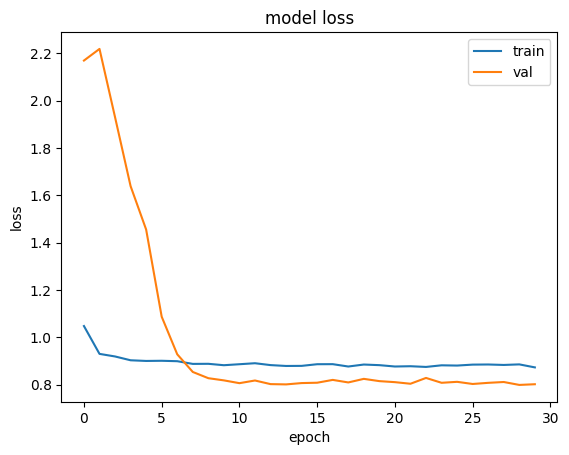

In [ ]:
plot_loss(history)

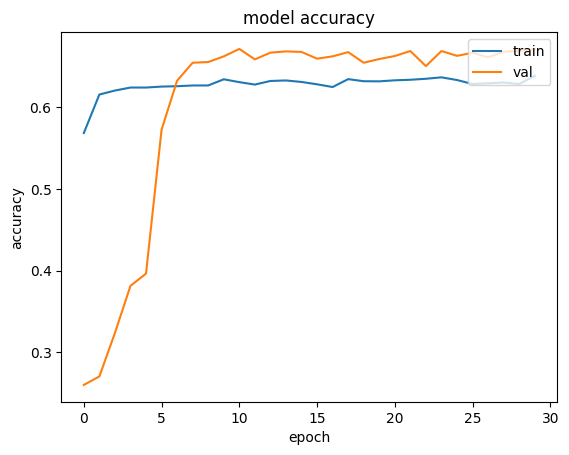

In [ ]:
plot_accuracy(history)



#**Test model**





> Save model with best weights



In [ ]:
model_json =  model.to_json()
with open("/content/MobileNetv2_model_focal.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
json_file = open("/content/MobileNetv2_model_focal.json", 'r')
model_json_c = json_file.read()
json_file.close()
model_c = model_from_json(model_json_c)
#Load the weights
model_c.load_weights("/content/MobileNet_weights_focal_loss.h5")
model_c.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])



> Predict test dataset (using generator)



In [ ]:
def test_model(generator,num_images):
    y_pred = []  # store predicted labels
    y_true = []  # store true labels
    i=0
# iterate over the dataset
    for image_batch, label_batch in generator:   # use dataset.unbatch() with repeat
         # append true labels
         label=np.argmax(label_batch, axis = - 1)
         y_true.append(label)
         print(len(label))
         print(label)
         #break

        # compute predictions
         preds = model_c.predict(image_batch)
        # append predicted labels
         y_pred.append(np.argmax(preds, axis = - 1))
         if(i == num_images // batch_size+1):
             break
         i+=1
     # convert the true and predicted labels into tensors
    correct_labels = tf.concat([item for item in y_true], axis = 0)
    predicted_labels = tf.concat([item for item in y_pred], axis = 0)
    return np.array(correct_labels),np.array(predicted_labels)


In [ ]:
correct_labels,predicted_labels=test_model(test_generator['test'],num_images_test)

<Figure size 1000x600 with 0 Axes>

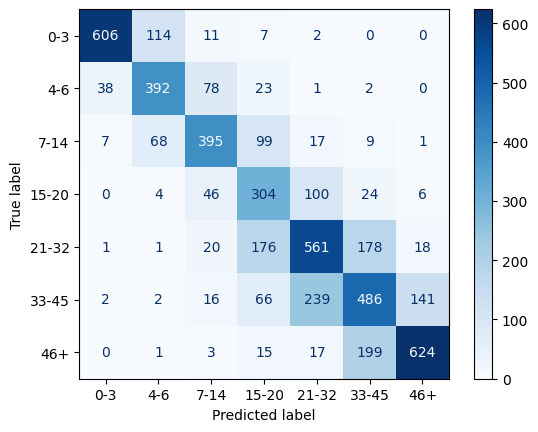

              precision    recall  f1-score   support

         0-3       0.93      0.82      0.87       740
         4-6       0.67      0.73      0.70       534
        7-14       0.69      0.66      0.68       596
       15-20       0.44      0.63      0.52       484
       21-32       0.60      0.59      0.59       955
       33-45       0.54      0.51      0.53       952
         46+       0.79      0.73      0.76       859

    accuracy                           0.66      5120
   macro avg       0.67      0.67      0.66      5120
weighted avg       0.67      0.66      0.66      5120



In [ ]:
plot_confusion_matrix(correct_labels,predicted_labels,labels)
from sklearn import metrics
print(metrics.classification_report(correct_labels, predicted_labels, target_names=labels))

<Figure size 1000x600 with 0 Axes>

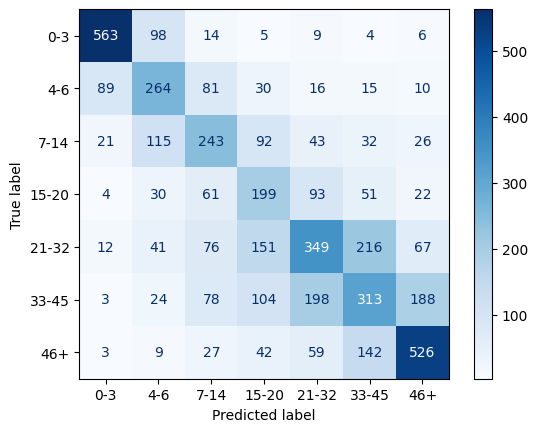

              precision    recall  f1-score   support

         0-3       0.81      0.81      0.81       699
         4-6       0.45      0.52      0.49       505
        7-14       0.42      0.42      0.42       572
       15-20       0.32      0.43      0.37       460
       21-32       0.46      0.38      0.42       912
       33-45       0.40      0.34      0.37       908
         46+       0.62      0.65      0.64       808

    accuracy                           0.51      4864
   macro avg       0.50      0.51      0.50      4864
weighted avg       0.51      0.51      0.50      4864



In [ ]:
plot_confusion_matrix(correct_labels,predicted_labels,labels)
from sklearn import metrics
print(metrics.classification_report(correct_labels, predicted_labels, target_names=labels))



> Predict test dataset (without generator)



In [ ]:
#predict test images

model_path='/content/MobileNetv2_model_focal.json'
weight_path='/content/MobileNet_weights_focal_loss.h5'
def predict_(model_c,image_paths):
    true_labels=[]
    predict_labels=[]

    # #Load the Model from Json File
    # json_file = open(model_path, 'r')
    # model_json_c = json_file.read()
    # json_file.close()
    # model_c = model_from_json(model_json_c)
    # #Load the weights
    # model_c.load_weights(weight_path)
    # #Compile the model
    # model_c.compile(
    #     optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    #     loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    #     metrics=['accuracy'])

    # Load h5 Model
    #model_c = tf.keras.models.load_model("/content/drive/MyDrive/Graduation_Project/MobileNetv2_best_model.h5")

    #iterate over DS
    i=0
    for path in image_paths:
       # load the raw data from the file as a string
        img = tf.io.read_file(path[0])

        # convert the compressed string to a 3D uint8 tensor
        img = tf.image.decode_jpeg(img, channels=3)
        # Use `convert_image_dtype` to convert to floats in the [0,1] range
        img = tf.image.convert_image_dtype(img, tf.float32)

        # resize the image to the desired size.
        img = tf.image.resize(img, [img_size, img_size])
        #plt.imshow(image)
        #predict the image
        img=img.numpy()
        preds = model_c.predict(np.expand_dims(img, axis=0))[0]
        res=preds.argmax()
        #print(preds)
        true_labels.append(int(path[2]))
        predict_labels.append(res)

        #print(res)
        # i+=1
        # if i==5:
        #    break
    return true_labels, predict_labels

1/1 [==============================] - 0s 24ms/step


<Figure size 1000x600 with 0 Axes>

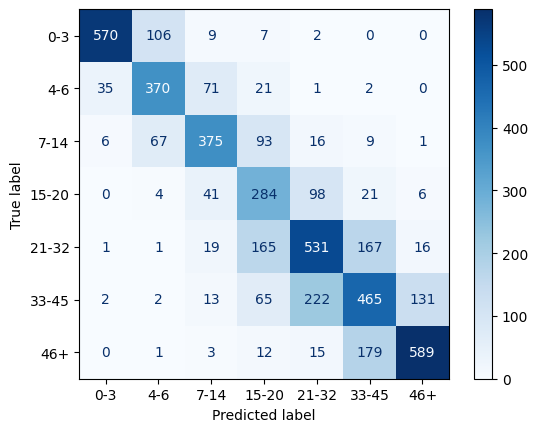

              precision    recall  f1-score   support

         0-3       0.93      0.82      0.87       694
         4-6       0.67      0.74      0.70       500
        7-14       0.71      0.66      0.68       567
       15-20       0.44      0.63      0.52       454
       21-32       0.60      0.59      0.59       900
       33-45       0.55      0.52      0.53       900
         46+       0.79      0.74      0.76       799

    accuracy                           0.66      4814
   macro avg       0.67      0.67      0.67      4814
weighted avg       0.68      0.66      0.67      4814



In [ ]:
true_labels, predict_labels=predict_(model_c,test_paths)
plot_confusion_matrix(true_labels, predict_labels,labels)
print(metrics.classification_report(true_labels, predict_labels, target_names=labels))

<Figure size 1000x600 with 0 Axes>

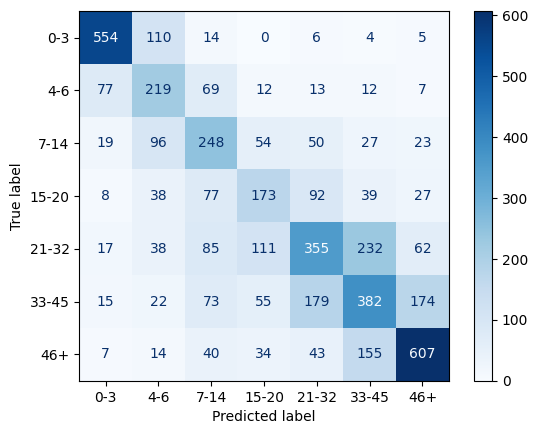

              precision    recall  f1-score   support

         0-3       0.79      0.80      0.80       693
         4-6       0.41      0.54      0.46       409
        7-14       0.41      0.48      0.44       517
       15-20       0.39      0.38      0.39       454
       21-32       0.48      0.39      0.43       900
       33-45       0.45      0.42      0.44       900
         46+       0.67      0.67      0.67       900

    accuracy                           0.53      4773
   macro avg       0.52      0.53      0.52      4773
weighted avg       0.53      0.53      0.53      4773



In [ ]:
true_labels_3, predict_labels_3=predict_(model_c,test_paths)
plot_confusion_matrix(true_labels_3, predict_labels_3,labels)
print(metrics.classification_report(true_labels_3, predict_labels_3, target_names=labels))



> Test script



In [ ]:
%cp /content/drive/MyDrive/Graduation_Project/Notebooks/face_detecion&aligned.py  /content/face_detection.py
%cp /content/drive/MyDrive/Graduation_Project/Weights/yolov5s-face.onnx /content/yolov5s-face.onnx

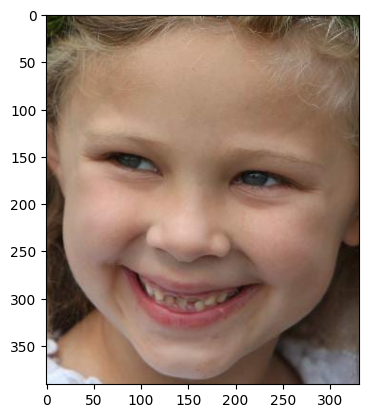

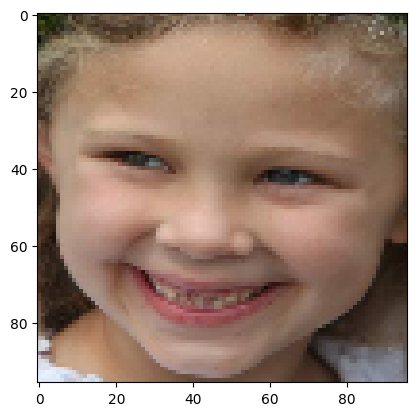

1/1 [==============================] - 1s 907ms/step
1


In [ ]:
from face_detection import yolov5

#predict 1 image

#load model
model_c = tf.keras.models.load_model("/content/drive/MyDrive/Graduation_Project/New_MobileNet_best_model.h5")
# load the raw data from the file as a string
img = tf.io.read_file('/content/1.jpeg')
# convert the compressed string to a 3D uint8 tensor
img = tf.image.decode_jpeg(img, channels=3)
img=img.numpy()
#apply faceDetection and alignment
img = yolov5(img, model_path='yolov5s-face.onnx')
if(img is not None):
  plt.imshow(img)
  plt.show()
img=tf.convert_to_tensor(img)

# Use `convert_image_dtype` to convert to floats in the [0,1] range (Normalize image)
img = tf.image.convert_image_dtype(img, tf.float32)

# resize the image to the desired size.
img = tf.image.resize(img, [96, 96])

#predict the image
img=img.numpy()
plt.imshow(img)
plt.show()
preds = model_c.predict(np.expand_dims(img, axis=0))[0]
res=preds.argmax()
print(res)



> Convert model to tflite & save it to drive



In [ ]:
##########save model and convert it to tflite############################

from keras.models import model_from_json

model_path='/content/New_MobileNetv2.json'
weight_path='/content/New_MobileNetv2.h5'
#Load the Model from Json File
json_file = open(model_path, 'r')
model_json_c = json_file.read()
json_file.close()
model_c = model_from_json(model_json_c)
#Load the weights
model_c.load_weights(weight_path)
#Compile the model
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

# save model .h5
model_c.save("/content/drive/MyDrive/Graduation_Project/New_MobileNet_best_model.h5")

# Load h5 Model
model = tf.keras.models.load_model("/content/drive/MyDrive/Graduation_Project/New_MobileNet_best_model.h5")

#Convert to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()
open("saved_lite_model.tflite", "wb").write(tflite_model)


%cp /content/saved_lite_model.tflite /content/drive/MyDrive/Graduation_Project/New_MobileNet_best_model.tflite